In [19]:
import json

def load_jsonl(f):
    return list(map(lambda x: json.loads(x), open(f).readlines()))

fsrs_6 = load_jsonl("../srs-benchmark/result/FSRS-6.jsonl")
button_usage = load_jsonl("button_usage.jsonl")

users = list(zip(fsrs_6, button_usage))
users = sorted(users, key=lambda u: u[1]["true_retention"])
users[0]

({'metrics': {'RMSE': 0.424474,
   'LogLoss': 0.539867,
   'RMSE(bins)': 0.061824,
   'ICI': 0.02604,
   'AUC': 0.683766},
  'user': 6853,
  'size': 28745,
  'parameters': {'0': [0.0872,
    0.3358,
    1.385,
    6.4885,
    7.1586,
    0.6287,
    3.3657,
    0.001,
    1.0714,
    0.3468,
    0.6791,
    1.6326,
    0.1895,
    0.2886,
    2.2517,
    0.2037,
    2.5403,
    0.4363,
    0.0,
    0.0,
    0.2024]}},
 {'user': 6852,
  'size': 4426,
  'first_rating_prob': [0.9705, 0.0, 0.0194, 0.0101],
  'review_rating_prob': [0.0556, 0.1111, 0.8333],
  'learn_costs': [8.18, 0.0, 5.73, 2.77],
  'review_costs': [2.21, 2.48, 4.27, 2.03],
  'first_rating_offset': [-2.72, 0.0, -1.08, 0.0],
  'first_session_len': [1.38, 0.0, 0.83, 0.0],
  'forget_rating_offset': -1.28,
  'forget_session_len': 0.64,
  'short_term_recall': [0.0174, 0.0, 0.4571, 0.0],
  'learning_step_transition': [[5513, 0, 75, 12],
   [0, 0, 0, 0],
   [48, 0, 18, 3]],
  'relearning_step_transition': [[18, 0, 0, 0], [0, 0, 0,

In [20]:
x = [user[1]["true_retention"] for user in users]
y = [user[0]["metrics"]["LogLoss"] for user in users]

[]

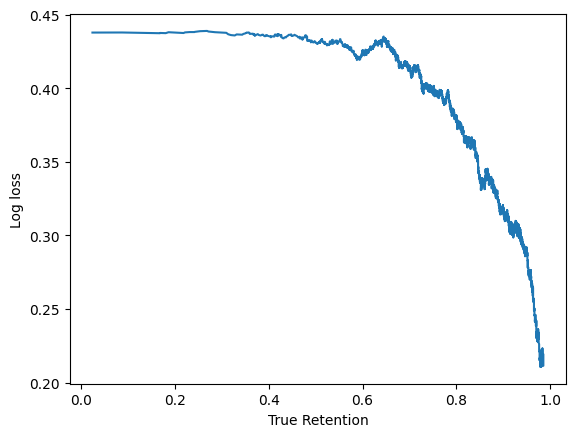

In [21]:
from matplotlib import pyplot as plt
import numpy as np

ax = plt.axes()
bin_size = 500

# https://stackoverflow.com/a/54628145/24162642
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

#ax.hist([user[1]["true_retention"] for user in users], bins=50)
ax.plot(x[:10000-bin_size], moving_average(y, bin_size))
ax.set_xlabel("True Retention")
ax.set_ylabel("Log loss")

ax.plot()


[-1.27725465  1.67207606 -0.69569746  0.5245289 ]


[]

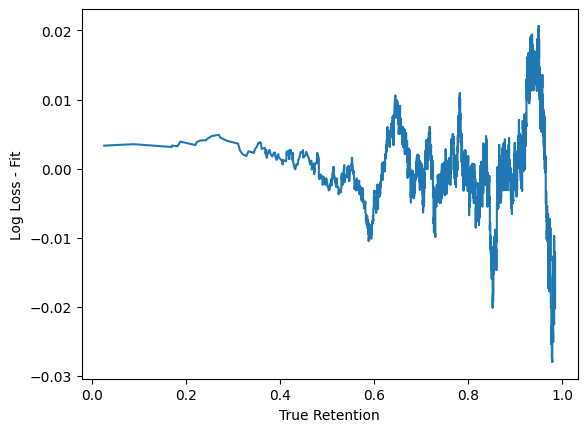

In [22]:
ax = plt.axes()

coefficients = np.polyfit(x, y, 3)
print(coefficients)

def retention_factor(r, x):
    return x - np.polyval(coefficients, r)

adjusted_loss = retention_factor(x, y)

ax.plot(
    x[:10000-bin_size],
    moving_average(
        adjusted_loss,
        bin_size,
    ),
)
ax.set_xlabel("True Retention")
ax.set_ylabel("Log Loss - Fit")

ax.plot()

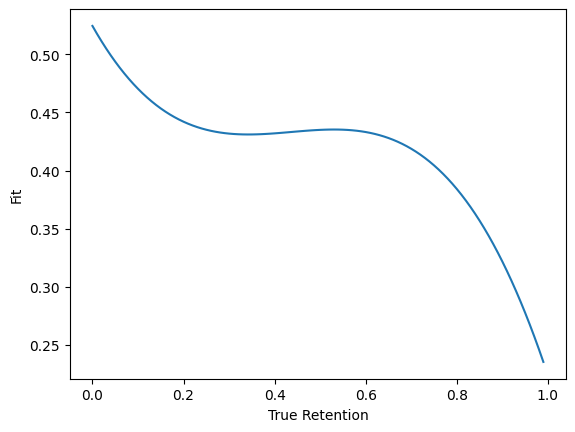

In [23]:
ax = plt.axes()

ax.set_xlabel("True Retention")
ax.set_ylabel("Fit")

ax.plot(np.arange(100) / 100, -retention_factor(np.arange(100) / 100, 0))

(array([ 18.,  34.,  53.,  68.,  89.,  95., 105., 146., 293., 340., 391.,
        395., 444., 538., 560., 630., 624., 670., 638., 621., 560., 512.,
        428., 387., 351., 236., 220., 172., 117.,  70.,  72.,  32.,  30.,
         28.,   8.,   7.,   6.,   5.,   1.,   1.,   1.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.42825003, -0.40339424, -0.37853845, -0.35368266, -0.32882688,
        -0.30397109, -0.2791153 , -0.25425951, -0.22940372, -0.20454793,
        -0.17969214, -0.15483635, -0.12998056, -0.10512478, -0.08026899,
        -0.0554132 , -0.03055741, -0.00570162,  0.01915417,  0.04400996,
         0.06886575,  0.09372154,  0.11857732,  0.14343311,  0.1682889 ,
         0.19314469,  0.21800048,  0.24285627,  0.26771206,  0.29256785,
         0.31742364,  0.34227943,  0.36713521,  0.391991  ,  0.41684679,
         0.44170258,  0.46655837,  0.49141416,  0.51626995,  0.54112574,
         0.56598153,  0.59083731,  0.6156931 ,  0.64054889,  0.66540468,
 

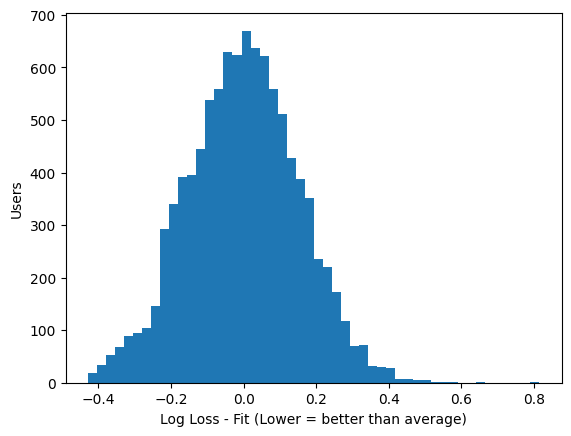

In [24]:
ax = plt.axes()

ax.set_xlabel("Log Loss - Fit (Lower = better than average)")
ax.set_ylabel("Users")

ax.hist(adjusted_loss, bins=50)